# Summarizing metrics from disturbed vertical lines

Leanne Friedrich 11/15/22

## initialization

In [1]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [3]:
import os
import sys
sys.path.append("../")
sys.path.append("../../")
from py.tools.config import cfg
import py.tools.logs as logs
from plainIm import plainIm
import matplotlib.pyplot as plt
import py.metrics.m_plots as mp
import py.metrics.m_SDT as me
import regression as rg
import matplotlib.cm as cm
import py.file.file_handling as fh
LOGGERDEFINED = logs.openLog('summary_vert_SDT.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

## analyzing data

In [178]:
ms = me.summarySDT(os.path.join(cfg.path.fig, 'singleDoubleTriple', 'summaries', 'VertSDTSummaries.csv')
                             , diag=True)

Independents: ['printFolder', 'sup_Ca', 'ink_Ca', 'sup_dnorm', 'ink_dnorm', 'sup_We', 'ink_We', 'sup_Oh', 'ink_Oh', 'int_Ca', 'bn', 'date', 'sigma', 'fluFile', 'calibFile', 'spacing', 'vRatio', 'dEst', 'viscRatio', 'rGrav', 'int_Re', 'ReRatio', 'hDragP', 'vDragP', 'int_CaInv', 'pressureCh0', 'ink_shortname', 'ink_days', 'ink_rheModifier', 'ink_surfactant', 'ink_surfactantWt', 'ink_dye', 'ink_var', 'ink_val', 'ink_base', 'ink_type', 'ink_tau0', 'ink_eta0', 'ink_density', 'ink_v', 'ink_rate', 'ink_visc0', 'ink_CaInv', 'ink_Re', 'ink_WeInv', 'ink_OhInv', 'ink_dPR', 'ink_dnormInv', 'ink_Bm', 'sup_shortname', 'sup_days', 'sup_rheModifier', 'sup_surfactant', 'sup_surfactantWt', 'sup_dye', 'sup_var', 'sup_val', 'sup_base', 'sup_type', 'sup_tau0', 'sup_eta0', 'sup_density', 'sup_v', 'sup_rate', 'sup_visc0', 'sup_CaInv', 'sup_Re', 'sup_WeInv', 'sup_OhInv', 'sup_dPR', 'sup_dnormInv', 'sup_Bm']

Dependents: ['x0_w1p', 'dxprint_w1p', 'segments_w1p', 'x0_w1o', 'w_w1o', 'h_w1o', 'xf_w1o', 'xc_w1o', 

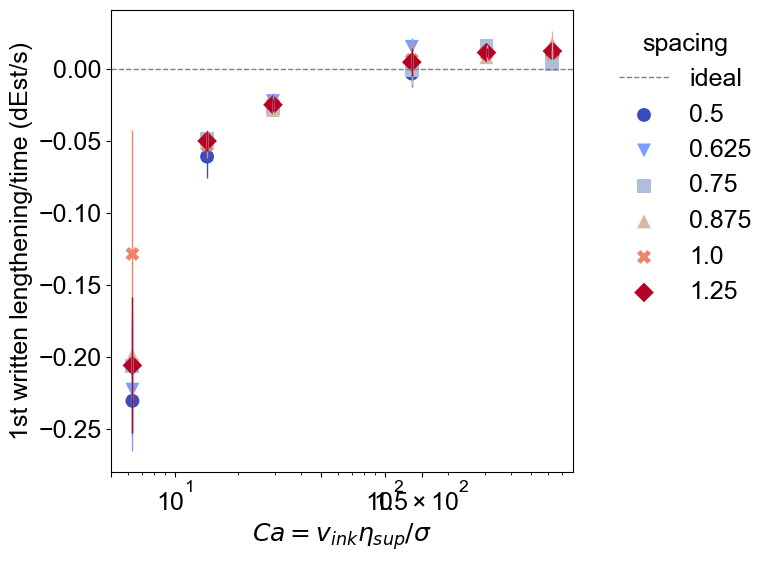

In [207]:
mp.scatterPlot(ms, ms.ss, zvar='spacing', xvar='int_Ca', yvar='dhdt_w1o'
                , logx=True, logy=False, plotType='ppt',  yideal=0)

In [133]:
ms.ss.ink_surfactantWt.unique()

array([0. , 0.5])

In [218]:
all(['w' in p for p in ['wo', 'dwdt', 'write']])

True

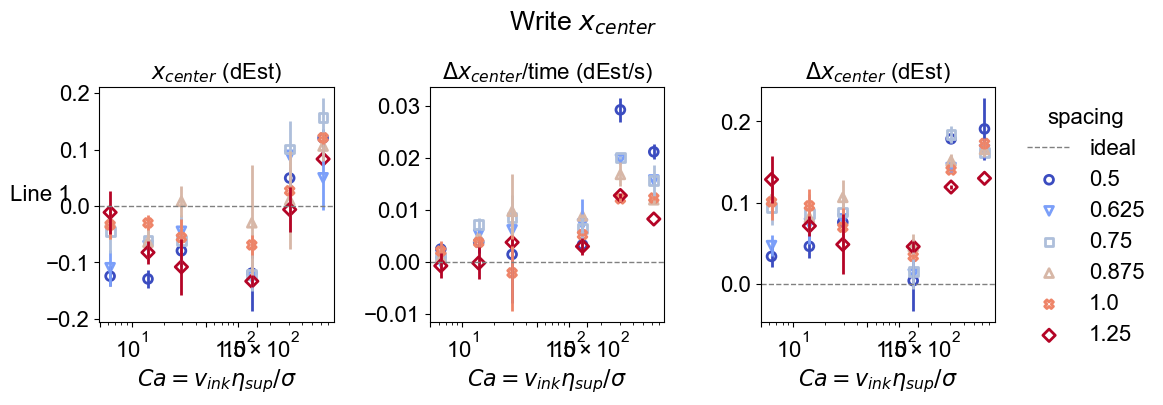

In [225]:
yvl = mp.yvarlines(ms, ms.ss, xvar='int_Ca', yvar='xc', zvar='spacing', llist=[2]
             , plist=['wo', 'dwdt', 'write'], plotType='notebook', yideal=0, logx=True)

In [177]:
ms.ss[ms.ss.dxcdt_w1o>.01].iloc[0]['printFolder']

'//cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\\singleDoubleTriple\\SO\\I_SO11_S_3.00\\I_SO11_S_3.00_230214\\disturbVert2_1_1.000'

In [200]:
rgt = mp.regressionTables(ms, 'dhdt_w1o', logy=False, printOut=True, export=False, package='tabular')

\begin{table}[H]
\centering
\caption[Linear regressions for 1st written lengthening/time at nonzero surface tension.]{Table of linear regressions of log-scaled x variables and Spearman rank correlations for \textbf{1st written lengthening/time} at nonzero surface tension. For example, ${Re}_{ink}$ indicates a regression fit to $y = b*log_{10}(Re_{ink}) + c$. A Spearman rank correlation coefficient of -1 or 1 indicates a strong correlation. Variables are defined in table \ref{tab:variableDefs}.}
\label{tab:dhdt_w1oRegNonZero}
\begin{tabular}{llrrll}
                                         variables &       $r^2$ &     b &     c & Spearman coeff &     Spearman p \\
                                           spacing &        0.00 &  0.03 & -0.09 &           0.04 &        5.6e-01 \\
		\hline
                                         $\bm{Ca}$ & $\bm{0.34}$ &  0.10 & -0.21 &    $\bm{0.90}$ & $\bm{1.1e-78}$ \\
                                        $Ca_{ink}$ &        0.18 &  0.08 & -0.01 &

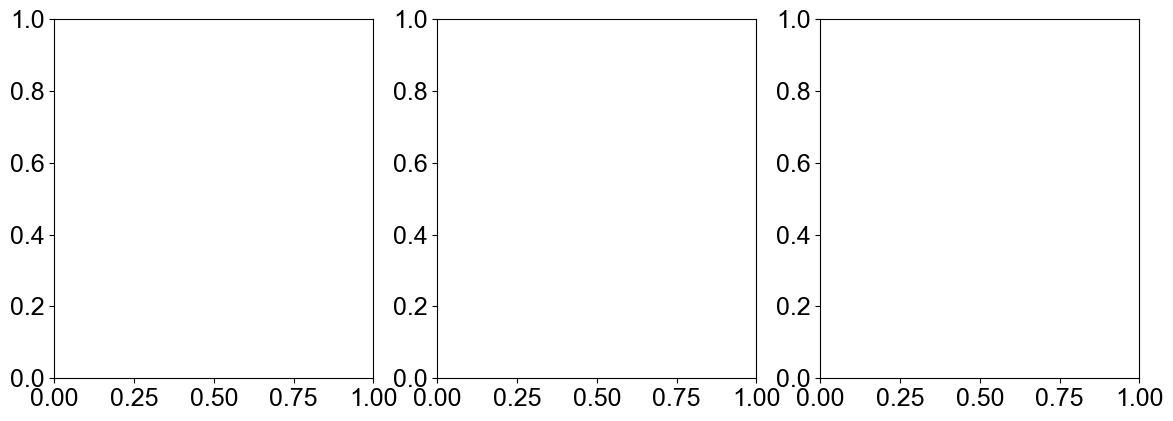

In [216]:
mp.multiPlot(1,3, plotType='ppt')

In [196]:
rgt.objlist[0].show()

\begin{table}[H]
\centering
\caption[Linear regressions for dhdt_w1o at nonzero surface tension.]{Table of linear regressions of log-scaled x variables and Spearman rank correlations for \textbf{dhdt_w1o} at nonzero surface tension. For example, ${Re}_{ink}$ indicates a regression fit to $y = b*log_{10}(Re_{ink}) + c$. A Spearman rank correlation coefficient of -1 or 1 indicates a strong correlation. Variables are defined in table \ref{tab:variableDefs}.}
\label{tab:dhdt_w1oRegNonZero}
\begin{tabular}{llrrll}
                                         variables &       $r^2$ &     b &     c & Spearman coeff &     Spearman p \\
                                           spacing &        0.00 &  0.03 & -0.09 &           0.04 &        5.6e-01 \\
                                         $\bm{Ca}$ & $\bm{0.34}$ &  0.10 & -0.21 &    $\bm{0.90}$ & $\bm{1.1e-78}$ \\
                                        $Ca_{ink}$ &        0.18 &  0.08 & -0.01 &           0.62 &        1.7e-24 \\
             

In [190]:
def waterOilPlots(yvar0:str, yideal:float, mode:str='ppt', export:bool=False, top:bool=True):
    if top:
        tlist = ['top', 'bot']
    else:
        tlist = ['bot']
    if mode=='ppt':
        figsize = (9,6+2*(len(tlist)-1))
        fs = 18
        markersize=100
    elif mode=='paper':
        figsize=(6,4)
        fs = 10
        markersize=20
    fig,axs = plt.subplots(len(tlist),2,figsize=figsize, sharey='row', sharex=True)
    if not top:
        axs = [axs]
    ms.ss.sort_values(by=['sigma', 'sup_val'], inplace=True)
    for i,sigma in enumerate(ms.ss.sigma.unique()):
        for j,si in enumerate(tlist):
            yvar = f'{si}_{yvar0}'
            mp.scatterSS(ms, ms.ss[ms.ss.sigma==sigma], 'spacing', yvar, 'sup_val'
                 ,fig=fig, ax=axs[j][i], logx=False, yideal=yideal, xideal=0.875, fontsize=fs, markersize=markersize
                         , legend=False, set_ylabel=False, set_xlabel=(j==len(tlist)-1))
    for axrow in axs:
        for ax in axrow:
            mp.setSquare(ax)
            if ms.ss[yvar].min()>0:
                yy = ms.ss[yvar].max()*0.9
            else:
                yy = ms.ss[yvar].min()*0.9
            ax.text(0.88, yy, 'space filling', color='#555555', fontsize=fs)
            ax.text(1.08, 0.01, 'ideal', color='#555555', fontsize=fs)
    axs[0][0].set_title('Water/water', fontsize=fs)
    axs[0][1].set_title('Oil/water', fontsize=fs)
    if top:
        axs[0][0].set_ylabel('Top')
        axs[1][0].set_ylabel('Bottom')
    fig.supylabel(ms.varSymbol(yvar).replace('bot ',''), fontsize=fs)
    fig.tight_layout()
    # if export:
    #     fig.savefig(os.path.join(cfg.path.fig, 'singleDisturb', 'figures', f'vert_{yvar}.svg'), bbox_inches='tight', dpi=300)

In [223]:
np.empty([3,1])

array([[0.],
       [0.],
       [0.]])